<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_3_EoML_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 3

En este laboratorio aplicaremos regresión logística simple y múltiple a un dataset de pasajeros del titanic para explorar las probabilidades de supervivencia respecto a predictores como edad, sexo y precio de boleto.

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


print("Todos los paquetes han sido importados:")
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Statsmodels-learn version: {}".format(statsmodels.__version__))

Todos los paquetes han sido importados:
Numpy version: 1.14.6
Pandas version: 0.22.0
Matplotlib version: 3.0.2
Seaborn version: 0.7.1
Statsmodels-learn version: 0.8.0


## Ejemplo de regresión logística: Cáncer de mama

Usando un dataset tomado de sklearn de cáncer de mama, mostraremos modelos de regresión logística para algunos de los predictores

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
bc = pd.DataFrame(data.data, columns=data.feature_names) # 30 predictores
bc["Clase"] = pd.DataFrame(data.target, columns=['Clase']) # clase (benigno o maligno)

In [0]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Clase
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
bc["Clase"].head()

0    0
1    0
2    0
3    0
4    0
Name: Clase, dtype: int64

Verifiquemos que el target es binario

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


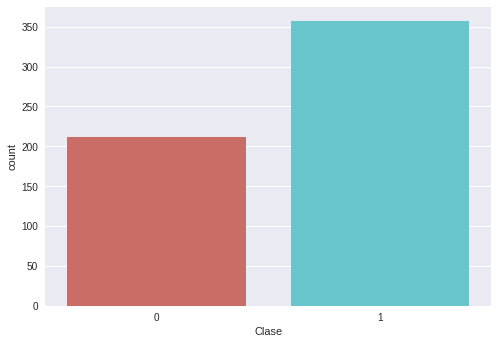

In [0]:
sns.countplot(x='Clase',data=bc, palette='hls')

Haremos una regresión logística entre el radio del tumor y la clase

In [0]:
est = smf.Logit(bc['Clase'], bc["mean radius"]).fit()
est.summary2()
#lo mas impotante es el coeficiente y z y p 
#coef que tan relacionadas estan las variables
#la prueba de hipotesis si z es > 2 o 1.96 se descarta la hipotesis nula
# H0 es que no tienen relacion
#Si p es < 0.05 se rechaza la hipotesis nula

Optimization terminated successfully.
         Current function value: 0.690213
         Iterations 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   3.0000  
Dependent Variable: Clase            Pseudo R-squared: -0.045  
Date:               2019-02-06 13:43 AIC:              787.4628
No. Observations:   569              BIC:              791.8067
Df Model:           0                Log-Likelihood:   -392.73 
Df Residuals:       568              LL-Null:          -375.72 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
mean radius    0.0105    0.0058  1.8238  0.0682  -0.0008  0.0219
===============================================================

"""

Los números de interés que arroja .summary2() son el coeficiente y el valor z. Un valor z mayor a 1.96 indica que existe una relación significativa entre el predictor y el target. El número e^coeficiente es una medida de cuánto aumenta el valor del target para aumentos en 1 del predictor. En este caso, vemos que la relación entre el radio medio y la clase de tumor es no significativa.

Haremos una regresión múltiple con los primeros 5 predictores de bc

In [0]:
est = smf.Logit(bc['Clase'], bc[bc.columns[0:5]]).fit() #target y predictor
est.summary2()
#lo mas impotante es el coeficiente y z y p 
#coef que tan relacionadas estan las variables
#la prueba de hipotesis si z es > 2 o 1.96 se descarta la hipotesis nula
# H0 es que no tienen relacion
#Si p es < 0.05 se rechaza la hipotesis nula

#en conjunto si influye pero sola no.

Optimization terminated successfully.
         Current function value: 0.150936
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit             No. Iterations:    10.0000 
Dependent Variable:    Clase             Pseudo R-squared:  0.771   
Date:                  2019-02-06 13:43  AIC:               181.7655
No. Observations:      569               BIC:               203.4849
Df Model:              4                 Log-Likelihood:    -85.883 
Df Residuals:          564               LL-Null:           -375.72 
Converged:             1.0000            Scale:             1.0000  
--------------------------------------------------------------------
                  Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------
mean radius        8.4813   1.2165  6.9719 0.0000    6.0970  10.8656
mean texture      -0.3442   0.0578 -5.9554 0.0000   -0.4574  -0.2309
mean perimeter    -0.7017   0.1718 -4.0834 0.0000   -1.0384  -0.3649
mean area         -0.0600   0.0075 -8.0505 0.0000   -0.0747  -0.0454
mean smoothness -108.0860  19.1643 -5.6400 0.0000 -145.6474 -70.5246
====================================================================

"""

In [0]:
list(bc.columns.values)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'Clase']

In [0]:
Clase = bc["Clase"]
mean_radius = bc["mean radius"] 
mean_texture = bc["mean texture"]
mean_perimeter = bc["mean perimeter"]
mean_area = bc["mean area"]
mean_smoothness = bc["mean smoothness"]
mean_compactness = bc["mean compactness"]
mean_concavity = bc["mean concavity"]
mean_concave_points = bc["mean concave points"]
mean_symmetry = bc["mean symmetry"]
mean_fractal_dimension = bc["mean fractal dimension"]
radius_error = bc["radius error"]
texture_error = bc["texture error"]
perimeter_error = bc["perimeter error"]
area_error = bc["area error"]
smoothness_error = bc["smoothness error"]
compactness_error = bc["compactness error"]
concavity_error = bc["concavity error"]
concave_points_error = bc["concave points error"]
symmetry_error = bc["symmetry error"]
fractal_dimension_error = bc["fractal dimension error"]
worst_radius = bc["worst radius"]
worst_texture = bc["worst texture"]
worst_perimeter = bc["worst perimeter"]
worst_area = bc["worst area"]
worst_smoothness = bc["worst smoothness"]
worst_compactness = bc["worst compactness"]
worst_concavity = bc["worst concavity"]
worst_concave_points = bc["worst concave points"]
worst_symmetry = bc["worst symmetry"]
worst_fractal_dimension = bc["worst fractal dimension"]
est = smf.ols(formula="Clase ~ mean_radius", data=bc).fit()
print(est.summary().tables[1])

est = smf.ols(formula="Clase ~ mean_radius+mean_texture+mean_perimeter+mean_area+mean_smoothness+mean_compactness+mean_concavity+mean_concave_points+mean_symmetry+mean_fractal_dimension+radius_error+texture_error+perimeter_error+area_error+smoothness_error+compactness_error+concavity_error+concave_points_error+symmetry_error+fractal_dimension_error+worst_radius+worst_texture+worst_perimeter+worst_area+worst_smoothness+worst_compactness+worst_concavity+worst_concave_points+worst_symmetry+worst_fractal_dimension", data=bc).fit()
print(est.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0436      0.057     35.615      0.000       1.931       2.156
mean_radius    -0.1002      0.004    -25.436      0.000      -0.108      -0.093
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0218      0.428      7.060      0.000       2.181       3.863
mean_radius                 0.2178      0.174      1.255      0.210      -0.123       0.559
mean_texture               -0.0045      0.008     -0.572      0.567      -0.020       0.011
mean_perimeter             -0.0237      0.025     -0.946      0.345      -0.073       0.026
mean_area                  -0.0003      0.001     -0.605      0.545      -0.001       0.001
mean_smoothness            -0.0847  

### Ejercicios



1.  ¿Cómo interpretas los resultados de la última tabla generada?

    * Se nota que existe una clara correlacion entre el mean radius, pero esto solo ocurre si se hace como conjunto con otros datos. Asi tambien las demas variables tienen una correlacion negativa, y asi tambien considerable aun cuando los resultados de z sean negativos.
    
2.   Haz una regresión lineal equivalente para las regresiones logísticas que hicimos y compara los resultados. ¿Qué concluye la regresión lineal sobre la hipótesis nula entre los predictores y la clase? ¿Es diferente esta conclusión a la que vemos con la regresión logística?
    * La regresion lineal demuestra que no se recahza la hipotesis nula entre los predictores y la clase. Si es diferente la conclusion pues en conjunto no influye pero como individual si influye.



In [0]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Datos de Titanic

Ahora usa los datos de supervivencia de Titanic encontrados en https://www.kaggle.com/c/titanic.

### Ejercicios



1.   Explora los datos de Titanic: identifica si hay datos perdidos y haz histogramas de los predictores (por lo menos 4) para darte una idea de los datos
  * la gran mayoria de datos perdidos estan en la edad y en la cabina en la que iba el pasajero, solo dos personas no se ocnoce si embarcaron o no.
2.   Haz una regresión logística múltiple de todos los predictores y la supervivencia de los pasajeros e interpreta los resultados. ¿Cuál de los predictores parece ser el más importante para determinar quién sobrevive o no, según una regresión logística múltiple?
  * En conjunto parece ser que le dato que mas influencia tiene es el sexo de la persona, especificamente ser hombre tenia mas probabilidades de no sobrevivir, despues de eso es la edad de la persona.



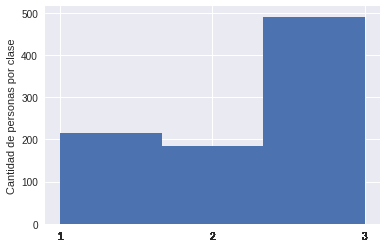

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = train['Pclass']
plt.hist(x, bins=3)
plt.xticks(x)
plt.ylabel('Cantidad de personas por clase');

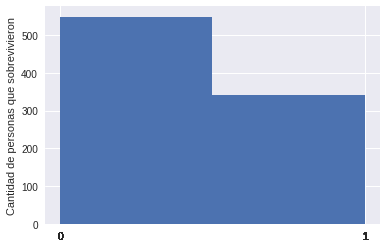

In [0]:
x = train['Survived']
plt.hist(x, bins=2)
plt.xticks(x)
plt.ylabel('Cantidad de personas que sobrevivieron');

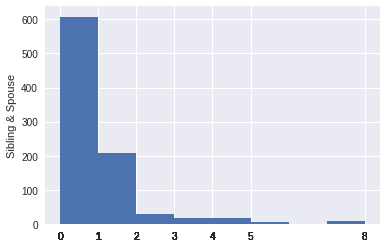

In [0]:
x = train['SibSp']
plt.hist(x, bins=8)
plt.xticks(x)
plt.ylabel('Sibling & Spouse');

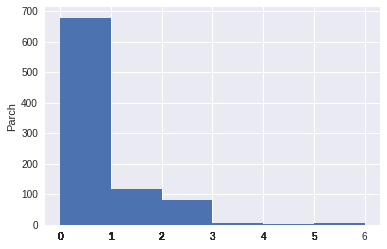

In [0]:
x = train['Parch']
plt.hist(x, bins=6)
plt.xticks(x)
plt.ylabel('Parch');

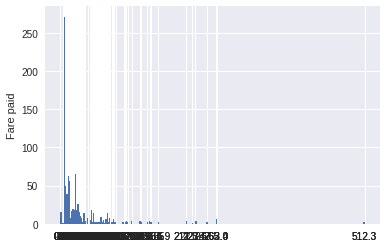

In [0]:
x = train['Fare']
plt.hist(x, bins=250)
plt.xticks(x)
plt.ylabel('Fare paid');

In [0]:
Survived = train['Survived']
Pclass = train['Pclass']
Sex = train['Sex']
SibSp = train['SibSp']
Parch = train['Parch']
Fare = train['Fare']

est = smf.ols(formula="Survived ~ Pclass+Sex+Age+SibSp+Parch+Fare+Embarked+Cabin", data=train).fit()
print(est.summary().tables[1])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.8356      0.620      1.347      0.185      -0.414       2.086
Sex[T.male]                 -0.4455      0.099     -4.508      0.000      -0.645      -0.246
Embarked[T.Q]               -0.0352      0.274     -0.128      0.899      -0.588       0.517
Embarked[T.S]                0.3741      0.421      0.889      0.379      -0.474       1.223
Cabin[T.A14]             -3.864e-14   9.92e-14     -0.390      0.699   -2.39e-13    1.61e-13
Cabin[T.A16]                 0.5305      0.554      0.957      0.344      -0.587       1.648
Cabin[T.A19]             -1.213e-14   7.35e-14     -0.165      0.870    -1.6e-13    1.36e-13
Cabin[T.A20]                 0.9470      0.539      1.758      0.086      -0.139       2.033
Cabin[T.A23]                 1.1919      0.654      1.823      0.075  